<a href="https://colab.research.google.com/github/SAsh-1102/House_Price_Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = {
    'Area': [1200, 1500, 1800, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Location': ['City', 'Suburb', 'City', 'Suburb', 'City', 'Suburb', 'City', 'Suburb', 'City', 'Suburb'],
    'Price': [200000, 250000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()  # Create an instance of LabelEncoder
df['Location'] = encoder.fit_transform(df['Location'])  # Access column by name

In [ ]:
X = df.drop(columns='Price', axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 12499.999999999898
MSE: 281336565.0969467
RMSE: 16773.09050523924
R² Score: 0.9973364585552952


In [ ]:
new_house = np.array([[2500, 4, 1]])
predicted_price = model.predict(new_house)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')

Predicted Price: $415,789.47


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


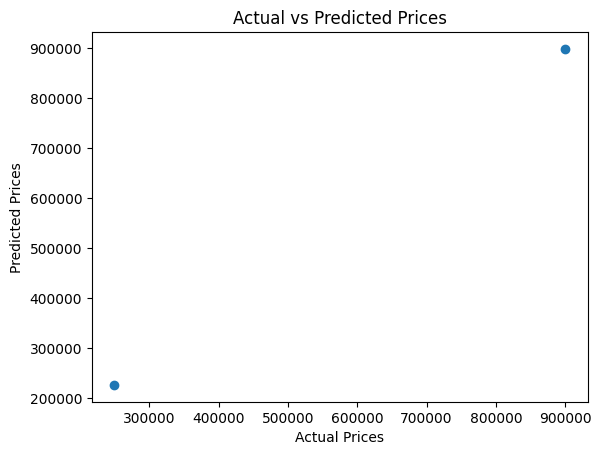

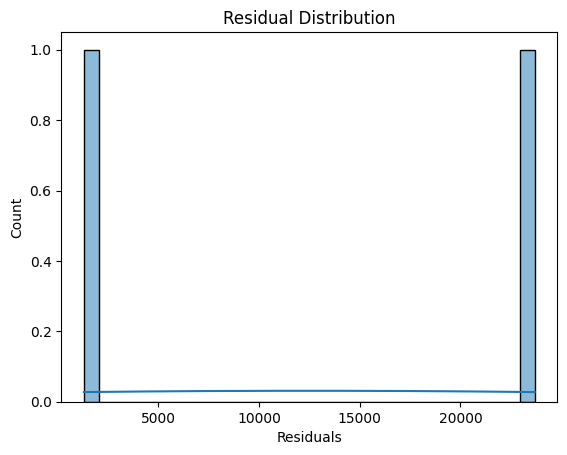

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()